# TensorFlow Image Classification
- https://www.tensorflow.org/tutorials/images/classification

In [1]:
import warnings
warnings.filterwarnings('ignore')

from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

### Binary Classification

In [279]:
# set path and segment images into two folders for training and validation
PATH = 'images_binary'
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

# set path to 5 categories for training
train_5050_dir = os.path.join(train_dir, '5050')  
train_dlr_dir = os.path.join(train_dir, 'dlr')   

# set path to 5 categories for validation
validation_5050_dir = os.path.join(validation_dir, '5050')  
validation_dlr_dir = os.path.join(validation_dir, 'dlr')  

In [280]:
num_5050_tr = len(os.listdir(train_5050_dir))
num_dlr_tr = len(os.listdir(train_dlr_dir))

num_5050_val = len(os.listdir(validation_5050_dir))
num_dlr_val = len(os.listdir(validation_dlr_dir))

total_train_2 = num_5050_tr + num_dlr_tr 
total_val_2 = num_5050_val + num_dlr_val 

In [281]:
print('total training 5050 images:', num_5050_tr)
print('total validation 5050 images:', num_5050_val)

print('total training dlr images:', num_dlr_tr)
print('total validation dlr images:', num_dlr_val)

print("--")
print("Total training images:", total_train_2)
print("Total validation images:", total_val_2)


total training 5050 images: 56
total validation 5050 images: 21
total training dlr images: 63
total validation dlr images: 31
--
Total training images: 119
Total validation images: 52


In [282]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [283]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [284]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary') 

Found 119 images belonging to 2 classes.


In [285]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary') #binary

Found 52 images belonging to 2 classes.


In [286]:
sample_training_images, _ = next(train_data_gen)

In [287]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

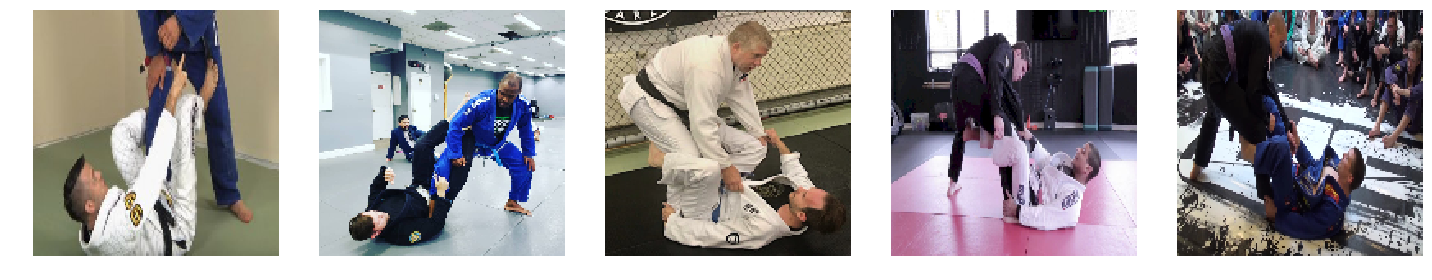

In [288]:
plotImages(sample_training_images[:5])

In [289]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [290]:
model.compile(optimizer='adam',
              loss='binary_crossentropy', # categorical_crossentropy
              metrics=['accuracy'])

In [ ]:
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               metrics=['accuracy'])


In [291]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 20736)           

In [292]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
2/2 [==============================] - 2s 1s/step - loss: 3.6733 - acc: 0.5000 - val_loss: 0.6895 - val_acc: 0.5000
Epoch 2/15
2/2 [==============================] - 1s 360ms/step - loss: 1.3320 - acc: 0.6176 - val_loss: 1.5458 - val_acc: 0.4038
Epoch 3/15
2/2 [==============================] - 1s 406ms/step - loss: 1.1126 - acc: 0.4706 - val_loss: 0.7376 - val_acc: 0.4038
Epoch 4/15
2/2 [==============================] - 1s 399ms/step - loss: 0.6822 - acc: 0.5000 - val_loss: 0.6804 - val_acc: 0.5962
Epoch 5/15
2/2 [==============================] - 1s 410ms/step - loss: 0.6916 - acc: 0.5294 - val_loss: 0.6749 - val_acc: 0.5962
Epoch 6/15
2/2 [==============================] - 1s 392ms/step - loss: 0.6718 - acc: 0.5294 - val_loss: 0.6763 - val_acc: 0.6154
Epoch 7/15
2/2 [==============================] - 1s 400ms/step - loss: 0.6349 - acc: 0.7605 - val_loss: 0.6993 - val_acc: 0.5000
Epoch 8/15
2/2 [==============================] - 1s 407ms/step - loss: 0.5922 - acc: 0.8697 

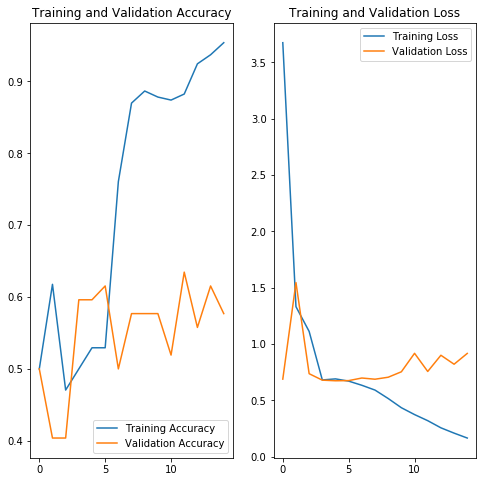

In [293]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


### Binary classification renders a 95% training accuracy and 57% validation accuracy.

*****

## Multiclass Classification
- https://analyticsindiamag.com/multi-label-image-classification-with-tensorflow-keras/

In [1]:
import warnings
warnings.filterwarnings('ignore')

from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
print(tf.__version__)

1.14.0


In [2]:
# set path and segment images into two folders for training and validation
PATH_2 = 'Images_multiclass'
train_dir = os.path.join(PATH_2, 'train')
validation_dir = os.path.join(PATH_2, 'validation')

# set path to 5 categories for training
train_5050_dir = os.path.join(train_dir, '5050')  
train_dlr_dir = os.path.join(train_dir, 'dlr')  
train_spider_dir = os.path.join(train_dir, 'spider')  
train_xguard_dir = os.path.join(train_dir, 'xguard')   
train_slx_dir = os.path.join(train_dir, 'slx')  

# set path to 5 categories for validation
validation_5050_dir = os.path.join(validation_dir, '5050')  
validation_dlr_dir = os.path.join(validation_dir, 'dlr')  
validation_spider_dir = os.path.join(validation_dir, 'spider')  
validation_xguard_dir = os.path.join(validation_dir, 'xguard') 
validation_slx_dir = os.path.join(validation_dir, 'slx')  

In [3]:
num_5050_tr = len(os.listdir(train_5050_dir))
num_dlr_tr = len(os.listdir(train_dlr_dir))
num_spider_tr = len(os.listdir(train_spider_dir))
num_xguard_tr = len(os.listdir(train_xguard_dir))
num_slx_tr = len(os.listdir(train_slx_dir))

num_5050_val = len(os.listdir(validation_5050_dir))
num_dlr_val = len(os.listdir(validation_dlr_dir))
num_spider_val = len(os.listdir(validation_spider_dir))
num_xguard_val = len(os.listdir(validation_xguard_dir))
num_slx_val = len(os.listdir(validation_slx_dir))

total_train = num_5050_tr + num_dlr_tr + num_spider_tr + num_xguard_tr + num_slx_tr 
total_val = num_5050_val + num_dlr_val + num_spider_val + num_xguard_val + num_slx_val 

In [4]:
print('total training 5050 images:', num_5050_tr)
print('total validation 5050 images:', num_5050_val)

print('total training dlr images:', num_dlr_tr)
print('total validation dlr images:', num_dlr_val)

print('total training spider images:', num_spider_tr)
print('total validation spider images:', num_spider_val)

print('total training xguard images:', num_xguard_tr)
print('total validation xguard images:', num_xguard_val)

print('total training slx images:', num_slx_tr)
print('total validation slx images:', num_slx_val)

print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training 5050 images: 56
total validation 5050 images: 21
total training dlr images: 63
total validation dlr images: 31
total training spider images: 70
total validation spider images: 26
total training xguard images: 63
total validation xguard images: 27
total training slx images: 98
total validation slx images: 49
--
Total training images: 350
Total validation images: 154


In [40]:
batch_size = 128 #128 from TS in binary, 32 in article on multiclass

In [6]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [7]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(128,128),
                                                           class_mode='categorical') 

Found 350 images belonging to 5 classes.


In [8]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              shuffle=True,
                                                              target_size=(128,128),
                                                              class_mode='categorical') 

Found 154 images belonging to 5 classes.


In [9]:
classifier = Sequential()

In [12]:
classifier.add(Conv2D(filters = 56,kernel_size = (3,3), activation = 'relu', input_shape = (128,128,3)))

In [13]:
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [14]:
classifier.add(Conv2D(32,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [15]:
classifier.add(Flatten())

In [16]:
classifier.add(Dense(units = 64, activation = 'relu'))

In [17]:
# units is the number of our classes
classifier.add(Dense(units = 5 , activation = 'softmax'))

In [18]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', 
                   metrics = ['categorical_accuracy','accuracy'])

In [19]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 56)      1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 56)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 56)        28280     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 56)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        16160     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

Training Data - Test 1

In [264]:
classifier.fit_generator(train_data_gen, epochs = 50, steps_per_epoch = 60 ) 

Epoch 1/50
60/60 [==============================] - 70s 1s/step - loss: 1.3970 - categorical_accuracy: 0.5276 - acc: 0.5276
Epoch 2/50
60/60 [==============================] - 72s 1s/step - loss: 1.2401 - categorical_accuracy: 0.6260 - acc: 0.6260
Epoch 3/50
60/60 [==============================] - 72s 1s/step - loss: 1.1675 - categorical_accuracy: 0.6426 - acc: 0.6426
Epoch 4/50
60/60 [==============================] - 73s 1s/step - loss: 1.1098 - categorical_accuracy: 0.6491 - acc: 0.6491
Epoch 5/50
60/60 [==============================] - 72s 1s/step - loss: 1.0626 - categorical_accuracy: 0.6514 - acc: 0.6514
Epoch 6/50
60/60 [==============================] - 72s 1s/step - loss: 1.0208 - categorical_accuracy: 0.6514 - acc: 0.6514
Epoch 7/50
60/60 [==============================] - 73s 1s/step - loss: 0.9852 - categorical_accuracy: 0.6517 - acc: 0.6517
Epoch 8/50
60/60 [==============================] - 72s 1s/step - loss: 0.9507 - categorical_accuracy: 0.6543 - acc: 0.6543
Epoch 9/

### Multiclass classification renders a 83% training accuracy for 5 classes. 
- batch size = 128
- epochs = 50, steps_per_epoch = 60
- categorical_crossentropy
- training set only (350 images)

Test 2 - Training and Validation Data

In [53]:
batch_size = 32 #128 from TS in binary, 32 in article on multiclass
epochs = 15

In [56]:
history = classifier.fit_generator(train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
10/10 [==============================] - 5s 462ms/step - loss: 1.9054 - categorical_accuracy: 0.1824 - acc: 0.1824 - val_loss: 1.6180 - val_categorical_accuracy: 0.1562 - val_acc: 0.1562
Epoch 2/15
10/10 [==============================] - 4s 422ms/step - loss: 1.6019 - categorical_accuracy: 0.2044 - acc: 0.2044 - val_loss: 1.5918 - val_categorical_accuracy: 0.2500 - val_acc: 0.2500
Epoch 3/15
10/10 [==============================] - 4s 410ms/step - loss: 1.5668 - categorical_accuracy: 0.3281 - acc: 0.3281 - val_loss: 1.5422 - val_categorical_accuracy: 0.2578 - val_acc: 0.2578
Epoch 4/15
10/10 [==============================] - 3s 344ms/step - loss: 1.4158 - categorical_accuracy: 0.4430 - acc: 0.4430 - val_loss: 1.5181 - val_categorical_accuracy: 0.3125 - val_acc: 0.3125
Epoch 5/15
10/10 [==============================] - 3s 337ms/step - loss: 1.1536 - categorical_accuracy: 0.6006 - acc: 0.6006 - val_loss: 1.4838 - val_categorical_accuracy: 0.3672 - val_acc: 0.3672
Epoch 6/15

The epochs are the number of times the cycle of training repeats. Steps-per-epoch determines the number of times the weights of each node should be updated for decreasing the loss.

dict_keys(['loss', 'categorical_accuracy', 'acc', 'val_loss', 'val_categorical_accuracy', 'val_acc'])


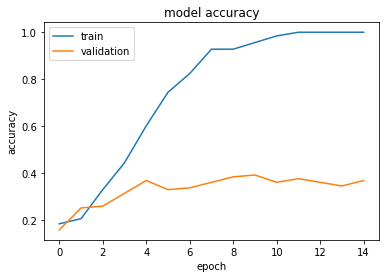

In [57]:
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

### Multiclass classification renders a 100% training accuracy and 37% validation accuracy. 
- batch size = 32
- epochs = 15, steps_per_epoch = training_set/val_set // batch_size
- categorical_crossentropy
- both training and validation set (350 + 154 = 504 images)

Epochs are too high. On the TS binary classification, there were 3000 photos and it ran 15 epochs. In the article on multiclass, it had 6206 images and 10 classes. We have only 500 photos and 5 classes. Resetting to a lower batch size and lower epochs.

Test 3 - Training and Validation Data, Changed Params

In [5]:
batch_size = 15 #128 from TS in binary, 32 in article on multiclass
epochs = 10

In [20]:
history = classifier.fit_generator(train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/10
23/23 [==============================] - 5s 209ms/step - loss: 1.6541 - categorical_accuracy: 0.2299 - acc: 0.2299 - val_loss: 1.5838 - val_categorical_accuracy: 0.3133 - val_acc: 0.3133
Epoch 2/10
23/23 [==============================] - 5s 216ms/step - loss: 1.6007 - categorical_accuracy: 0.3045 - acc: 0.3045 - val_loss: 1.5665 - val_categorical_accuracy: 0.3133 - val_acc: 0.3133
Epoch 3/10
23/23 [==============================] - 5s 200ms/step - loss: 1.5930 - categorical_accuracy: 0.3134 - acc: 0.3134 - val_loss: 1.5746 - val_categorical_accuracy: 0.3267 - val_acc: 0.3267
Epoch 4/10
23/23 [==============================] - 5s 206ms/step - loss: 1.5104 - categorical_accuracy: 0.3701 - acc: 0.3701 - val_loss: 1.6971 - val_categorical_accuracy: 0.2133 - val_acc: 0.2133
Epoch 5/10
23/23 [==============================] - 4s 192ms/step - loss: 1.3546 - categorical_accuracy: 0.4269 - acc: 0.4269 - val_loss: 1.5413 - val_categorical_accuracy: 0.3333 - val_acc: 0.3333
Epoch 6/10

dict_keys(['loss', 'categorical_accuracy', 'acc', 'val_loss', 'val_categorical_accuracy', 'val_acc'])


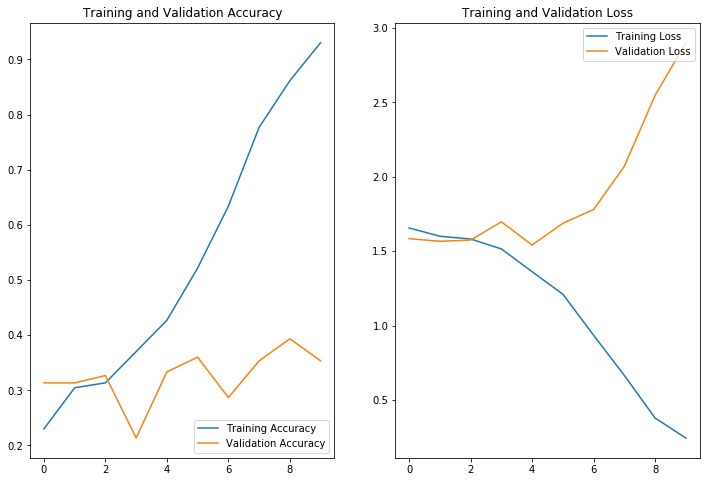

In [21]:
print(history.history.keys())
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Multiclass classification renders a 93% training accuracy and 35% validation accuracy. 
- batch size = 15
- epochs = 10, steps_per_epoch = training_set/val_set // batch_size
- categorical_crossentropy
- both 504 images

#### I feel comfortable with these accuracy results for the size of our data. We might want to increase the number of photos to increase learning.

****

### New Images For Prediction on Test Set 

In [ ]:
# gather anther 50 images across all 5 classes, prepare names into csv, and run below

In [22]:
PATH_3 = 'Images_multiclass/test/'
test_set = pd.read_csv(PATH_3 + "test_bjj.csv")
test_imgs = ["Images_multiclass/test/{}.png".format(x) for x in list(test_set.id)]
test_set = pd.DataFrame( {'Images': test_imgs })

In [23]:
test_dir = os.path.join(PATH_2, 'test/')
num_test = len(os.listdir(test_dir))
print('total test images:', num_test)

total test images: 54


In [24]:
classes = train_data_gen.class_indices
print(classes)

{'5050': 0, 'dlr': 1, 'slx': 2, 'spider': 3, 'xguard': 4}


In [25]:
from keras.preprocessing import image

Y_pred = []

for i in range(len(test_set)):
    img = image.load_img(path= test_set.Images[i],target_size=(128,128,3))
    img = image.img_to_array(img)
    test_img = img.reshape((1,128,128,3))
    img_class = classifier.predict_classes(test_img)
    prediction = img_class[0]
    Y_pred.append(prediction)

Using TensorFlow backend.


Test 1 Predictions

In [113]:
print(Y_pred)

[0, 4, 4, 1, 0, 3, 1, 1, 3, 1, 1, 3, 1, 1, 2, 2, 2, 2, 1, 2, 2, 3, 1, 4, 1, 3, 1, 0, 4, 0, 1, 2, 2, 0, 1, 3, 3, 2, 3, 1, 1, 2, 4, 2, 3, 4, 2, 2, 1, 0]


Test 2 Predictions

In [27]:
print(Y_pred)

[1, 1, 1, 0, 1, 0, 1, 0, 0, 4, 4, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 4, 4, 1, 4, 0, 1, 1, 0, 0, 1, 0, 1, 1, 3, 4, 1, 1, 0, 0, 1, 1, 0]


Test 3 Predictions

In [26]:
print(Y_pred)

[0, 4, 1, 1, 1, 3, 0, 0, 0, 2, 1, 1, 1, 3, 2, 2, 1, 3, 1, 4, 1, 2, 1, 1, 2, 2, 1, 3, 4, 2, 4, 1, 0, 4, 2, 4, 2, 1, 1, 0, 1, 3, 2, 0, 1, 2, 3, 3, 0, 0]


Prediction accuracy is only about 24-32%, which mirrors the validation accuracy scores. Need to work on getting training and validation accuracy scores closer for the model to perform well on new data.

Save predictions to dataframe and csv 

In [27]:
guards = []
for i in Y_pred:
    guards.append(i) 

In [117]:
predictions = {}
predictions['class_name'] = guards
predictions['image_num'] = test_set

In [121]:
pd.DataFrame(predictions).to_csv(PATH_3 + "bjjguards_predictions.csv", index = False)